In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbn # seaborn, istatistiksel veri görselleştirmesi için kullanılan bir araçtır.Seaborn, Matplotlib'e dayanarak daha estetik ve kullanımı kolay grafikler oluşturmayı sağlar.
from sklearn import preprocessing # etiketleme içim gerekli kütüphane

# gerekli kütüphaneleri ekleyelim
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection



Volkswagen Araba Fiyat Tahmini


In [3]:
dataFrame = pd.read_csv("vw.csv") # araç verimizi okuduk dataFrame olarak okunur
dataFrame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [4]:
dataFrame.sample(5) # Veri setimizdeki rastgele 5 örneği inceliyoruz

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10803,Tiguan,2020,29790,Manual,5000,Diesel,145,47.9,2.0
5436,Golf,2019,20000,Manual,50,Diesel,145,62.8,2.0
12868,Up,2014,5200,Manual,15000,Petrol,20,62.8,1.0
8514,Polo,2016,9190,Manual,40404,Petrol,20,60.1,1.2
2767,Golf,2017,13995,Manual,17985,Petrol,150,58.9,1.0


Verinin İncelenmesi


In [5]:
dataFrame.head() # Veri seti'nin ilk 5 verisini inceleyelim

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [6]:
""" 
DataFrame'in istatistiksel özetini transpozunu alıyoruz. 
Bu, her sütun için count, mean, std (standart sapma), min (minimum değer), 25%, 50% (median), 75% ve max (maksimum değer) istatistiklerini içerir.
Bu şekilde, her bir özniteliğin istatistiksel özetini daha okunabilir bir şekilde görebiliriz.
"""
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,15157.0,2017.255789,2.053059,2000.0,2016.0,2017.0,2019.0,2020.0
price,15157.0,16838.952365,7755.015206,899.0,10990.0,15497.0,20998.0,69994.0
mileage,15157.0,22092.785644,21148.941635,1.0,5962.0,16393.0,31824.0,212000.0
tax,15157.0,112.744277,63.482617,0.0,30.0,145.0,145.0,580.0
mpg,15157.0,53.753355,13.642182,0.3,46.3,53.3,60.1,188.3
engineSize,15157.0,1.600693,0.461695,0.0,1.2,1.6,2.0,3.2


In [7]:
# dataFrame[(dataFrame.price<899.0) | (dataFrame.price>60000.0) | (dataFrame.mileage>200000.0)]


In [8]:
dataFrame.model.describe()

count     15157
unique       27
top        Golf
freq       4863
Name: model, dtype: object

In [9]:
dataFrame.model.value_counts()

model
Golf               4863
Polo               3287
Tiguan             1765
Passat              915
Up                  884
T-Roc               733
Touareg             363
Touran              352
T-Cross             300
Golf SV             268
Sharan              260
Arteon              248
Scirocco            242
Amarok              111
Caravelle           101
CC                   95
Tiguan Allspace      91
Beetle               83
Shuttle              61
Caddy Maxi Life      59
Jetta                32
California           15
Caddy Life            8
Eos                   7
Caddy                 6
Caddy Maxi            4
Fox                   4
Name: count, dtype: int64

In [10]:
dataFrame.model.unique()

array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
       ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
       ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
       ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
       ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
       ' Fox'], dtype=object)

In [11]:
dataFrame.year.describe()

count    15157.000000
mean      2017.255789
std          2.053059
min       2000.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

In [12]:
dataFrame.year.value_counts()

year
2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: count, dtype: int64

In [13]:
dataFrame.year.unique()

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001],
      dtype=int64)

In [14]:
dataFrame.fuelType.describe()

count      15157
unique         4
top       Petrol
freq        8553
Name: fuelType, dtype: object

In [15]:
dataFrame.fuelType.value_counts()

fuelType
Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: count, dtype: int64

In [16]:
dataFrame.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

<Axes: ylabel='fuelType'>

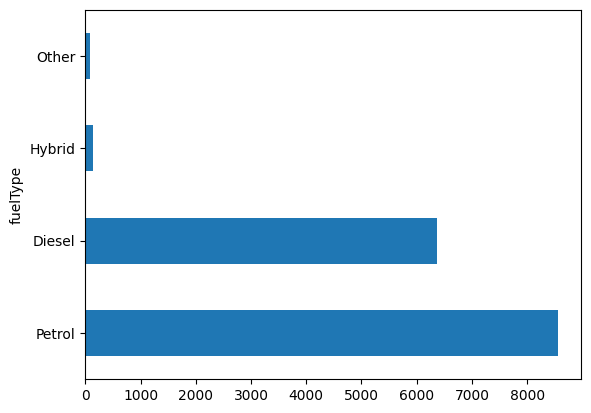

In [17]:
dataFrame.fuelType.value_counts().plot.barh()

Text(0, 0.5, 'Yakıt Tipi')

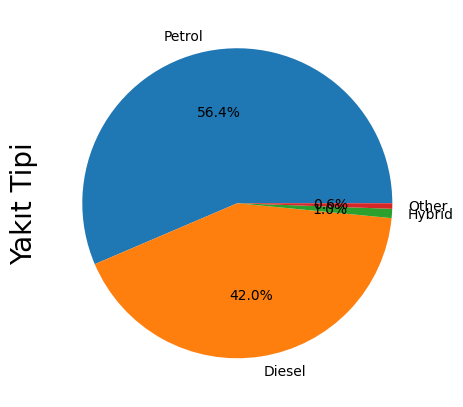

In [18]:
fig = plt.figure(figsize=(5,15))
dataFrame.fuelType.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.ylabel("Yakıt Tipi", fontsize=20)

In [19]:
dataFrame.transmission.describe()

count      15157
unique         3
top       Manual
freq        9417
Name: transmission, dtype: object

In [20]:
dataFrame.transmission.value_counts()

transmission
Manual       9417
Semi-Auto    3780
Automatic    1960
Name: count, dtype: int64

In [21]:
dataFrame.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

Text(0, 0.5, 'Vites Tipi')

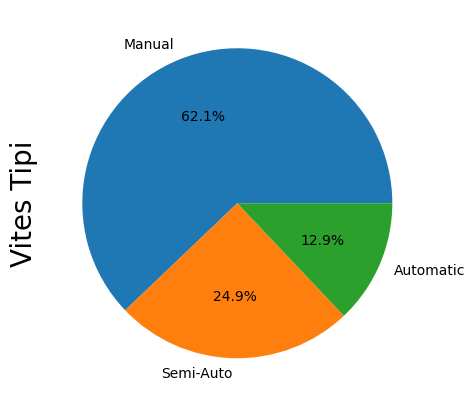

In [22]:
fig = plt.figure(figsize=(5,15))
dataFrame.transmission.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.ylabel("Vites Tipi", fontsize=20)

In [23]:
dataFrame.engineSize.describe()

count    15157.000000
mean         1.600693
std          0.461695
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          3.200000
Name: engineSize, dtype: float64

<Axes: ylabel='engineSize'>

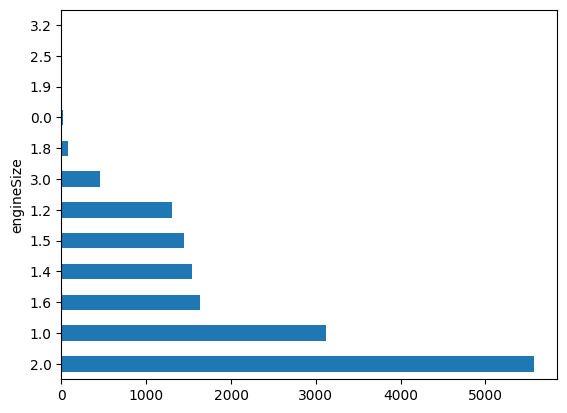

In [24]:
dataFrame.engineSize.value_counts().plot.barh()

In [25]:
dataFrame.engineSize.unique()

array([2. , 1.5, 1. , 1.6, 0. , 1.4, 3.2, 1.2, 1.9, 1.8, 2.5, 3. ])

<Axes: ylabel='price'>

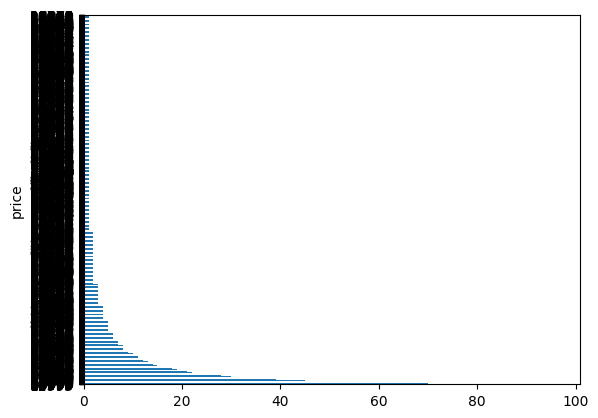

In [26]:
dataFrame.price.value_counts().plot.barh()

C:\Users\baha_\AppData\Local\Temp\ipykernel_17224\1971519577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["price"],kde=False, norm_hist=True) # Fiyatların grafiğe dökülmesi


'\ndataFrame["price"]: Bu, görselleştirmek istediğiniz veri setinin belirli bir sütununu seçer. Örneğin, "price" sütunu bir araba fiyatlarını içeriyor, bu sütunun dağılımını görselleştirmek istiyoruz.\n#kde=False: Bu parametre, çekirdek yoğunluk tahmininin (Kernel Density Estimation) gösterilmesini engeller. Yani, grafikte çizgi halinde bir yoğunluk tahmini çizilmez.\nnorm_hist=True: Bu parametre, histogramın yoğunluklarının normalize edilmesini sağlar. Yani, toplam alan 1\'e eşit olacak şekilde ayarlanır.\n'

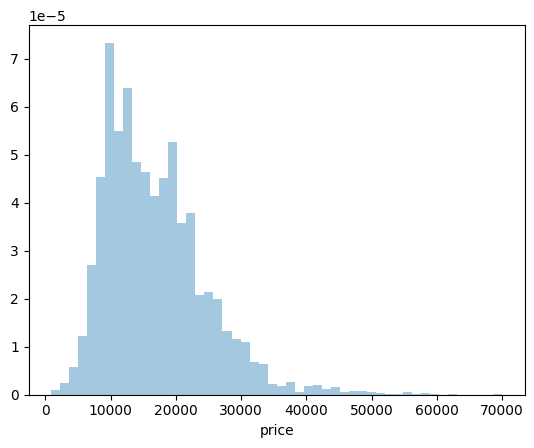

In [27]:
sbn.distplot(dataFrame["price"],kde=False, norm_hist=True) # Fiyatların grafiğe dökülmesi
'''
dataFrame["price"]: Bu, görselleştirmek istediğiniz veri setinin belirli bir sütununu seçer. Örneğin, "price" sütunu bir araba fiyatlarını içeriyor, bu sütunun dağılımını görselleştirmek istiyoruz.
#kde=False: Bu parametre, çekirdek yoğunluk tahmininin (Kernel Density Estimation) gösterilmesini engeller. Yani, grafikte çizgi halinde bir yoğunluk tahmini çizilmez.
norm_hist=True: Bu parametre, histogramın yoğunluklarının normalize edilmesini sağlar. Yani, toplam alan 1'e eşit olacak şekilde ayarlanır.
'''

In [28]:
""" 
Veri tipi object olan featureleri tanıyalım. Daha iyi bir model eğitmek için int veya float olabilecek object veri tiplerini düzelterek çevirmeliyiz.
"unique methodu benzersiz değerleri geri dönderir yani tekrarları atar." 
"""
dataFrame["model"].unique() , dataFrame["transmission"].unique() , dataFrame["fuelType"].unique()

(array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
        ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
        ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
        ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
        ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
        ' Fox'], dtype=object),
 array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
 array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object))

In [29]:
dataFrame.engineSize.value_counts()

engineSize
2.0    5570
1.0    3121
1.6    1629
1.4    1536
1.5    1446
1.2    1304
3.0     450
1.8      77
0.0      15
1.9       4
2.5       3
3.2       2
Name: count, dtype: int64

In [30]:
# Tanımlanmış yapıları kontrol edelim
dataFrame.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [31]:
# Eksik gözlem değerimiz var mı ona bakalım
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Verilerimizi inceledik, etiketleme işlemlerine geçebiliriz

In [32]:
LabelEncoder=preprocessing.LabelEncoder() # # etiketleyici nesnemizi oluşturalım

In [33]:
"""
sütunlarımızı makine öğrenmesine hazır hale getirmek için etiketleyip uygun formata sokalım
fit_transform ile etiketleme yapmış oluruz.
"""
dataFrame["model"] = LabelEncoder.fit_transform(dataFrame.model).astype('int64')

In [34]:
dataFrame.model.unique()

array([21, 12, 15, 20, 16, 22, 18, 26, 17,  2,  7,  9, 24,  1, 25, 13,  0,
       23, 19, 14,  3,  8,  5,  4,  6, 10, 11], dtype=int64)

In [35]:
dataFrame["transmission"] = LabelEncoder.fit_transform(dataFrame.transmission).astype('int64')

In [36]:
LabelEncoder.classes_ # etiketlediğimiz verileri görebiliriz böyle

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [37]:
dataFrame.transmission.unique()

array([0, 1, 2], dtype=int64)

In [38]:
dataFrame["fuelType"] = LabelEncoder.fit_transform(dataFrame.fuelType).astype('int64')

In [39]:
LabelEncoder.classes_ # etiketlediğimiz verileri görebiliriz böyle

array(['Diesel', 'Hybrid', 'Other', 'Petrol'], dtype=object)

In [40]:
dataFrame.fuelType.unique()

array([0, 3, 2, 1], dtype=int64)

In [41]:
dataFrame.head(5) # modellere sayılsal değerler atandı

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,21,2019,25000,0,13904,0,145,49.6,2.0
1,21,2019,26883,0,4562,0,145,49.6,2.0
2,21,2019,20000,1,7414,0,145,50.4,2.0
3,21,2019,33492,0,4825,3,145,32.5,2.0
4,21,2019,22900,2,6500,3,150,39.8,1.5


In [42]:
dataFrame.corr()["price"].sort_values() #diğer araç özelliklerinin "fiyat"la korelasyonları


mileage        -0.517599
mpg            -0.496844
fuelType       -0.233692
model           0.004375
transmission    0.097699
tax             0.482964
engineSize      0.575139
year            0.614748
price           1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

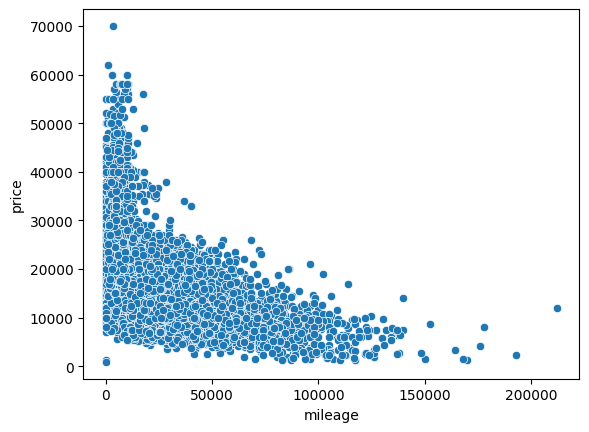

In [43]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame) #Araçların mil'lere göre fiyat grafiği


Verinin Düzeltilmesi


In [44]:
doksanDokuzDf = dataFrame.sort_values("price",ascending=False).iloc[152:] # İlk veri seti'ndeki en pahalı %1 aracı, veri setinin pürüzlerini düzeltmek için çıkardım. 15157 x 0.001 = 151.57 yani yaklaşık 152 satir


In [45]:
doksanDokuzDf.describe() 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000,15005.000000
mean,16.067311,2017.235921,16519.772742,1.120693,22263.637721,1.729690,112.279573,53.961593,1.590850
std,5.382937,2.053355,7095.262204,0.598275,21183.852445,1.472027,63.529813,13.549841,0.450755
min,0.000000,2000.000000,899.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000
25%,12.000000,2016.000000,10980.000000,1.000000,6000.000000,0.000000,30.000000,46.300000,1.200000
50%,16.000000,2017.000000,15475.000000,1.000000,16622.000000,3.000000,145.000000,53.300000,1.600000
75%,21.000000,2019.000000,20990.000000,1.000000,32000.000000,3.000000,145.000000,60.100000,2.000000
max,26.000000,2020.000000,42950.000000,2.000000,212000.000000,3.000000,580.000000,188.300000,3.200000


C:\Users\baha_\AppData\Local\Temp\ipykernel_17224\2652412373.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(doksanDokuzDf["price"], kde=False, norm_hist=True)


<Axes: xlabel='price'>

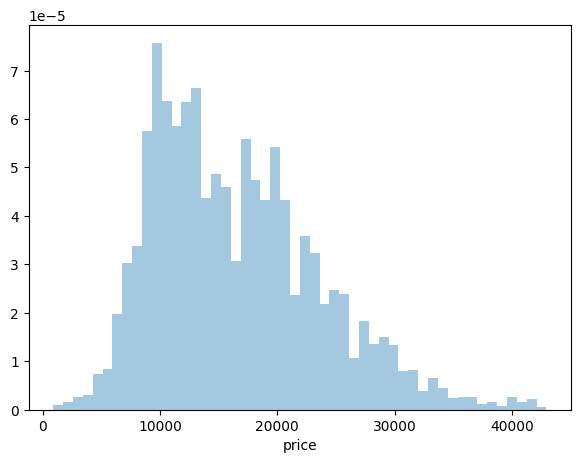

In [47]:
plt.figure(figsize=(7,5))
sbn.distplot(doksanDokuzDf["price"], kde=False, norm_hist=True)

In [48]:
doksanDokuzDf.groupby("year").mean()["price"] #Yeni veri seti'nin yıllara göre fiyat ortalaması, göze batan araçlar yok.


year
2000     1999.000000
2001     2043.500000
2002     1275.000000
2003     6875.000000
2004     1545.666667
2005     3732.375000
2006     3935.562500
2007     3345.650000
2008     3879.851852
2009     4873.258065
2010     4952.658537
2011     7770.491228
2012     7889.637500
2013     8153.647619
2014     9325.896552
2015    11100.346921
2016    12692.361919
2017    14455.086868
2018    17901.725100
2019    21749.370500
2020    22905.511881
Name: price, dtype: float64

In [52]:
dataFrame = doksanDokuzDf
dataFrame

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13550,24,2019,42950,0,4000,0,145,34.0,3.0
13396,9,2019,42900,2,2544,0,145,32.8,2.0
13844,24,2019,42499,0,6500,0,145,34.0,3.0
13533,24,2019,42498,2,10,0,145,34.5,3.0
13408,9,2019,42495,0,6900,0,145,33.6,2.0
...,...,...,...,...,...,...,...,...,...
13300,2,2001,1295,1,110000,3,200,49.6,1.6
774,12,2004,1287,1,170000,0,165,52.3,2.0
5083,12,2002,1275,1,117000,3,280,35.8,2.0
15155,11,2006,1250,1,82704,3,150,46.3,1.2


Makine öğrenmesi algoritmamızı oluşturalım.


In [57]:
# makine öğrenmesinde bağımlı ve bağımsız değişkenleri belirlememiz gerekir,
# fiyat değerimiz, diğer tüm değerlere bağlı olarak değiştiği için fiyat ve diğerleri olarak ayırmalıyız.
# X dataframe'i oluşturup fiyatı bundan çıkarırız
# y dataframe'i oluşturup buna sadece fiyatı ekleriz
X = dataFrame.drop(["price"],axis=1)
y = dataFrame["price"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=144)

In [64]:
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
12038,18,2019,2,10753,0,145,41.5,2.0
9300,16,2018,1,8555,3,150,64.2,1.0
2554,12,2019,1,5045,3,145,47.1,1.5
7362,16,2017,1,42727,3,20,58.9,1.0
9468,16,2012,1,40122,3,125,51.4,1.2
...,...,...,...,...,...,...,...,...
14842,23,2019,1,39,3,145,36.2,1.5
8441,16,2019,1,3435,3,150,52.3,1.0
2656,12,2016,2,35525,0,30,62.8,2.0
13856,1,2019,0,99,0,145,52.3,2.0


In [65]:
X_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4559,12,2019,0,8911,3,150,37.7,2.0
2765,12,2014,1,31834,0,0,74.3,1.6
2813,12,2019,2,2369,3,150,32.8,2.0
5284,12,2014,1,51410,0,20,68.9,2.0
2701,12,2013,1,61520,3,125,53.3,1.4
...,...,...,...,...,...,...,...,...
6959,16,2015,1,37164,3,150,47.0,1.8
8258,16,2016,1,38000,3,20,60.1,1.2
5952,15,2020,1,2000,0,150,57.7,2.0
3969,12,2020,2,3000,3,145,32.8,2.0


In [66]:
y_train

12038    24590
9300     12500
2554     17298
7362      7998
9468      5475
         ...  
14842    26498
8441     15500
2656     17501
13856    26491
13099    12699
Name: price, Length: 11253, dtype: int64

In [67]:
y_test

4559    27989
2765     8995
2813    28990
5284     9999
2701     7450
        ...  
6959    11995
8258     9052
5952    27000
3969    41990
6370    12850
Name: price, Length: 3752, dtype: int64

In [68]:
"""
Bu kod parçası, XGBoost Regresyon modelinizin hiperparametrelerini belirlemek için bir Grid Search Cross-Validation (Grid Arama Çapraz Doğrulama) işlemi gerçekleştirir. 
params: Grid Search işlemi için denenmesi gereken farklı hiperparametre kombinasyonlarını içeren bir sözlük.
XGBRegressor: XGBoost Regresyon modelinin temsilcisini oluşturur.
GridSearchCV: Grid Search Cross-Validation işlemini başlatır. Bu, hiperparametrelerin belirli bir aralıkta denenmesini ve en iyi performansı veren hiperparametreleri bulmayı sağlar.
cv: Çapraz doğrulama kat sayısını belirtir. Burada 10 olarak belirlenmiş, yani 10 katlı çapraz doğrulama yapılacaktır.
n_jobs: Paralel işlemlerin sayısını belirtir. -1 değeri, mevcut tüm işlemcilerin kullanılmasını ifade eder.
verbose: Ayrıntı seviyesini belirtir. 2 olarak belirlenmiş, yani işlem sırasında detaylı çıktıların görüntülenmesini sağlar.
fit(): Grid Search işlemini başlatır ve en iyi parametreleri bulur.
print(grid.best_params_): En iyi parametreleri yazdırır.
"""

hiperDic = {
    "colsample_bytree":[0.4,0.5,0.6],
    "learning_rate":[0.01,0.02,0.09],
    "max_depth":[2,3,4,5,6],
    "n_estimators":[100,200,500,2000]
}

xgb = XGBRegressor()
grid = GridSearchCV(xgb,hiperDic,cv=10,n_jobs=-1,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}


In [69]:
# bir üst adımda tespit ettiğimiz parametlerimiz
best_params = "{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}"
print("Best params: ",best_params)

Best params:  {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 2000}


In [70]:
# bu parametreleri kullanarak modelimizi eğitelim
xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth = 6, n_estimators = 2000)
model_xgb = xgb1.fit(X_train, y_train)

In [71]:
# test verileri üzerinde bir tahmin işlemi gerçekleştirelim
print("Tahminler: ",model_xgb.predict(X_test)[15:20])
print("Gerçek değerler: ", y_test[15:20])


Tahminler:  [12552.607  10151.517  25062.967  22014.924   7939.8916]
Gerçek değerler:  3578     12695
8970     10690
11014    21750
821      23995
7214      7898
Name: price, dtype: int64


In [72]:
# test skorumuz modelimizin başarı oranıdır, maksimum 1 olabilir (pek mümkün değildir ama)
print("Test score: ",model_xgb.score(X_test,y_test))

Test score:  0.9637001307264234


In [74]:
# bu işlemle modelimizin kendisinin tespit ettiği önem sıralamasını görebiliriz.
importance = pd.DataFrame({
    "Importance":model_xgb.feature_importances_},
    index=X_train.columns
    )

print(importance)

              Importance
model           0.088342
year            0.198508
transmission    0.047434
mileage         0.052818
fuelType        0.067591
tax             0.092759
mpg             0.231616
engineSize      0.220933


In [76]:
X_test[15:20]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
3578,12,2016,2,41424,3,30,53.3,1.4
8970,16,2017,1,35861,3,150,60.1,1.2
11014,22,2018,2,14446,0,145,40.4,2.0
821,12,2019,2,10,3,145,45.6,1.5
7214,16,2015,1,29768,3,20,60.1,1.0


In [82]:
y_test[15:20]

3578     12695
8970     10690
11014    21750
821      23995
7214      7898
Name: price, dtype: int64

In [80]:

model = 12
year = 2016
transmission = 2
mileage = 41424
fuelType = 3
tax = 30
mpg = 53.3
engineSize = 1.4
predict_data = [[model],[year],[transmission],[mileage],[fuelType],[tax],[mpg],[engineSize]]
dataFrame2 = pd.DataFrame([[model, year, transmission, mileage, fuelType, tax, mpg, engineSize]], columns=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'])
model_xgb.predict(dataFrame2)


array([12552.607], dtype=float32)